# 1. Importing Libraries

In [664]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
import missingno as mso
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# 2. Reading Data Set

In [665]:
Data = pd.read_csv(r'C:\Users\vaibh\OneDrive\Desktop\On_Going_ML_Project/loan-train.csv')

In [666]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [667]:
Data.shape

(614, 13)

# 3. Data Exploration

In [668]:
Data_cat = [var for var in Data.columns if Data[var].dtype == 'O']
print('There are {} categorical variables in Data \n'.format(len(Data_cat)))
print('Categorical Variables are :', Data_cat)

There are 8 categorical variables in Data 

Categorical Variables are : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [669]:
Data_num = [num for num in Data.columns if Data[num].dtype != 'O']
print('There are {} numerical variable in Data \n'.format(len(Data_num)))
print("Numerical Variables are", Data_num)

There are 5 numerical variable in Data 

Numerical Variables are ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [670]:
print("The total number of Columns in Data are :", len(Data.columns))

The total number of Columns in Data are : 13


## 3.1 Univariate Analysis

### 3.1.1 Target Variable in Data

#### 3.1.1.1 Loan Status

In [671]:
print("Null Value in Loan Status :", Data['Loan_Status'].isnull().sum())

Null Value in Loan Status : 0


In [672]:
print("Number of Unique Values in Loan Status :", Data['Loan_Status'].nunique())

Number of Unique Values in Loan Status : 2


In [673]:
print("Number of Y and N in Loan Status are :\n", Data['Loan_Status'].value_counts())

Number of Y and N in Loan Status are :
 Y    422
N    192
Name: Loan_Status, dtype: int64


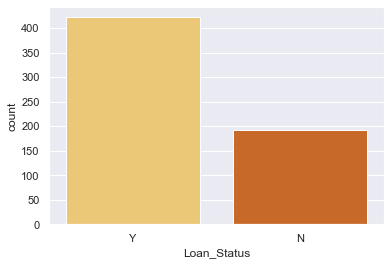

In [674]:
sns.countplot(x="Loan_Status", data=Data, palette="YlOrBr")
plt.show()

In [675]:
countY = len(Data[Data.Loan_Status == 'Y'])
countN = len(Data[Data.Loan_Status == 'N'])
countNull = len(Data[Data.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(Data.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(Data.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


### 3.1.2 Categorical Variable in Train Data

#### 3.1.2.1 Loan ID

In [676]:
print("Null Value in Loan ID :", Data['Loan_ID'].isnull().sum())
print("Number of Unique Values in Loan ID :", Data['Loan_ID'].nunique())

Null Value in Loan ID : 0
Number of Unique Values in Loan ID : 614


In [677]:
Data['Loan_ID'].head()

0    LP001002
1    LP001003
2    LP001005
3    LP001006
4    LP001008
Name: Loan_ID, dtype: object

#### 3.1.2.2 Gender

In [678]:
print("Null Value in Gender :", Data['Gender'].isnull().sum())
print("Number of Unique Values in Gender :", Data['Gender'].nunique())

Null Value in Gender : 13
Number of Unique Values in Gender : 2


In [679]:
print("Number of Male and Females in Gender are :\n", Data['Gender'].value_counts())

Number of Male and Females in Gender are :
 Male      489
Female    112
Name: Gender, dtype: int64


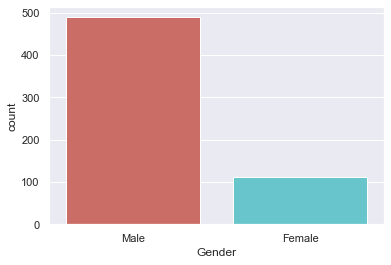

In [680]:
sns.countplot(x = "Gender", data = Data, palette = "hls")
plt.show()

In [681]:
Data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [682]:
countMale = len(Data[Data.Gender == 'Male'])
countFemale = len(Data[Data.Gender == 'Female'])
countNull = len(Data[Data.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(Data.Gender)))*100))

print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(Data.Gender)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Gender)))*100))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


#### 3.1.2.3 Married

In [683]:
print("Null Value in Married :", Data['Married'].isnull().sum())

Null Value in Married : 3


In [684]:
print("Number of Unique Values in Married :", Data['Married'].nunique())

Number of Unique Values in Married : 2


In [685]:
print("Number of Yes and No in Married are :\n", Data['Married'].value_counts())

Number of Yes and No in Married are :
 Yes    398
No     213
Name: Married, dtype: int64


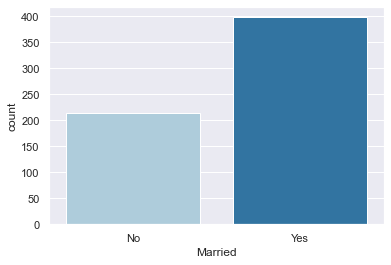

In [686]:
sns.countplot(x = "Married", data = Data, palette = "Paired")
plt.show()

In [687]:
countMarried = len(Data[Data.Married == 'Yes'])
countNotMarried = len(Data[Data.Married == 'No'])
countNull = len(Data[Data.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(Data.Married)))*100))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(Data.Married)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Married)))*100))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


#### 3.1.2.4 Dependents

In [688]:
print("Null Value in Dependents :", Data['Dependents'].isnull().sum())

Null Value in Dependents : 15


In [689]:
print("Number of Unique Values in Dependents :", Data['Dependents'].nunique())

Number of Unique Values in Dependents : 4


In [690]:
print("Number of 0, 1, 2, 3+ in Dependent are :\n", Data['Dependents'].value_counts())

Number of 0, 1, 2, 3+ in Dependent are :
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


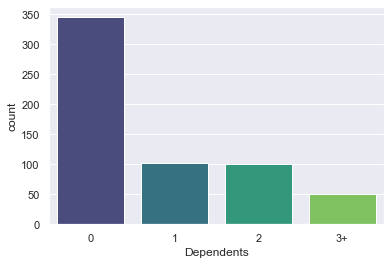

In [691]:
sns.countplot(x="Dependents", data=Data, palette="viridis")
plt.show()

In [692]:
count_0 = len(Data[Data.Dependents == '0'])
count_1 = len(Data[Data.Dependents == '1'])
count_2 = len(Data[Data.Dependents == '2'])
count_3 = len(Data[Data.Dependents == '3+'])
count_Null = len(Data[Data.Dependents.isnull()])

print("Percentage of 0 Dependents: {:.2f}%".format((count_0 / (len(Data.Dependents)))*100))
print("Percentage of 1 Dependents: {:.2f}%".format((count_1 / (len(Data.Dependents)))*100))
print("Percentage of 2 Dependents: {:.2f}%".format((count_2 / (len(Data.Dependents)))*100))
print("Percentage of 3+ Dependents: {:.2f}%".format((count_3 / (len(Data.Dependents)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Dependents)))*100))

Percentage of 0 Dependents: 56.19%
Percentage of 1 Dependents: 16.61%
Percentage of 2 Dependents: 16.45%
Percentage of 3+ Dependents: 8.31%
Missing values percentage: 0.49%


#### 3.1.2.5 Education

In [693]:
print("Null Value in Eduction :", Data['Education'].isnull().sum())

Null Value in Eduction : 0


In [694]:
print("Number of Unique Values in Education :", Data['Education'].nunique())

Number of Unique Values in Education : 2


In [695]:
print("Number of Graduate and Not Graduate in Education are :\n", Data['Education'].value_counts())

Number of Graduate and Not Graduate in Education are :
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


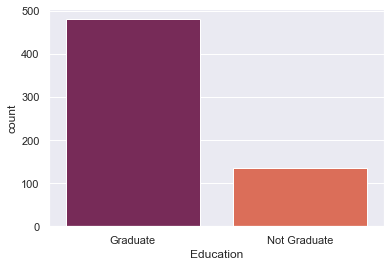

In [696]:
sns.countplot(x="Education", data=Data, palette="rocket")
plt.show()

In [697]:
countGraduate = len(Data[Data.Education == 'Graduate'])
countNotGraduate = len(Data[Data.Education == 'Not Graduate'])
countNull = len(Data[Data.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(Data.Education)))*100))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(Data.Education)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Education)))*100))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


#### 3.1.2.6 Self Employed

In [698]:
print("Null Value in Self Employed :", Data['Self_Employed'].isnull().sum())

Null Value in Self Employed : 32


In [699]:
print("Number of Unique Values in Self Employed :", Data['Self_Employed'].nunique())

Number of Unique Values in Self Employed : 2


In [700]:
print("Number of Yes and No in Self Employed are :\n", Data['Self_Employed'].value_counts())

Number of Yes and No in Self Employed are :
 No     500
Yes     82
Name: Self_Employed, dtype: int64


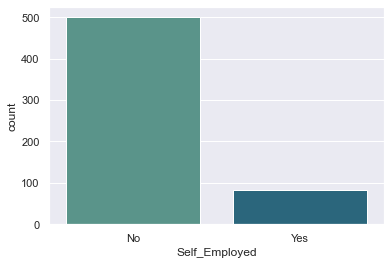

In [701]:
sns.countplot(x="Self_Employed", data=Data, palette="crest")
plt.show()

In [702]:
countNo = len(Data[Data.Self_Employed == 'No'])
countYes = len(Data[Data.Self_Employed == 'Yes'])
countNull = len(Data[Data.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(Data.Self_Employed)))*100))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(Data.Self_Employed)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Self_Employed)))*100))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


#### 3.1.2.7 Property Area

In [703]:
print("Null Value in Property Area :", Data['Property_Area'].isnull().sum())

Null Value in Property Area : 0


In [704]:
print("Number of Unique Values in Property Area :", Data['Property_Area'].nunique())

Number of Unique Values in Property Area : 3


In [705]:
print("Number of Urban, Semiurban and Rural in Property Area are :\n", Data['Property_Area'].value_counts())

Number of Urban, Semiurban and Rural in Property Area are :
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


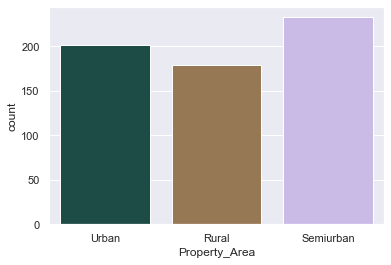

In [706]:
sns.countplot(x="Property_Area", data=Data, palette="cubehelix")
plt.show()

In [707]:
countUrban = len(Data[Data.Property_Area == 'Urban'])
countRural = len(Data[Data.Property_Area == 'Rural'])
countSemiurban = len(Data[Data.Property_Area == 'Semiurban'])
countNull = len(Data[Data.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(Data.Property_Area)))*100))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(Data.Property_Area)))*100))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(Data.Property_Area)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Property_Area)))*100))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


### 3.1.3 Numerical Variable in Train Data

In [708]:
Data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


#### 3.1.3.1 Applicant Income

In [709]:
print("Null Value in Applicant Income :", Data['ApplicantIncome'].isnull().sum())

Null Value in Applicant Income : 0


In [710]:
print("Number of Unique Values in Applicant Income :", Data['ApplicantIncome'].nunique())

Number of Unique Values in Applicant Income : 505


In [711]:
print(Data['ApplicantIncome'].describe())

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


Text(0.5, 0, 'Applicant Income')

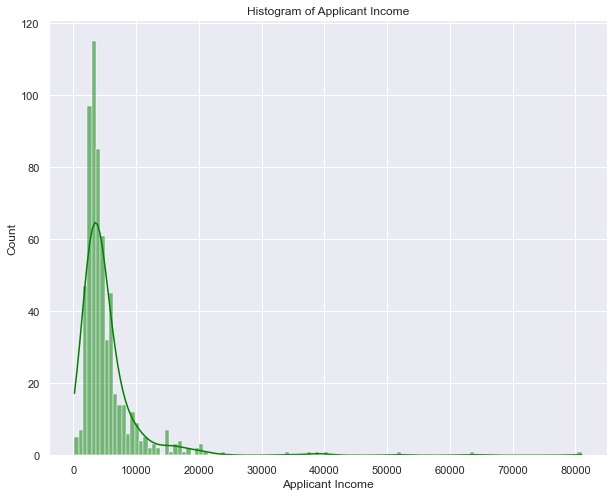

In [712]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=Data, x="ApplicantIncome", kde=True, color='green')
ax.set_title('Histogram of Applicant Income')
ax.set_xlabel('Applicant Income')

Text(0, 0.5, 'Applicant Income')

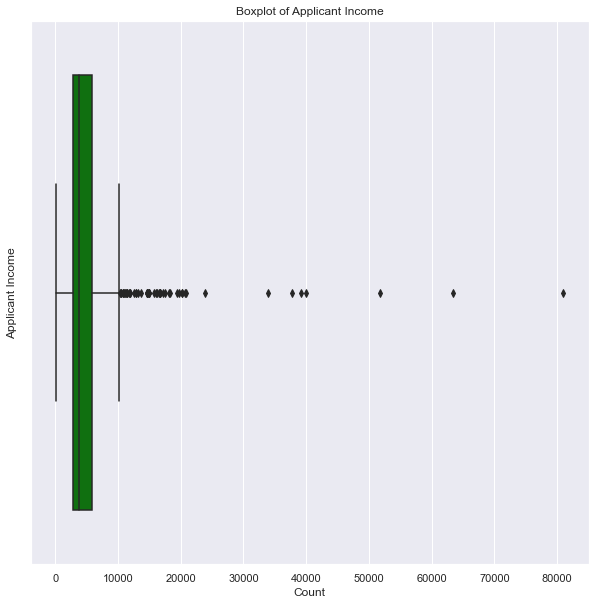

In [713]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="ApplicantIncome", data = Data, color='green')
ax.set_title('Boxplot of Applicant Income')
ax.set_xlabel('Count')
ax.set_ylabel('Applicant Income')

In [714]:
count_NotNullValues_ApplicantIncome = len(Data[Data.ApplicantIncome.notnull()])
count_NullValues_ApplicantIncome = len(Data[Data.ApplicantIncome.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_ApplicantIncome / (len(Data.ApplicantIncome)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_ApplicantIncome / (len(Data.ApplicantIncome)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


#### 3.1.3.2 Co-applicant Income

In [715]:
print("Null Value in Co-applicant Income:", Data['CoapplicantIncome'].isnull().sum())

Null Value in Co-applicant Income: 0


In [716]:
print("Number of Unique Values in Co-Applicant Income :", Data['CoapplicantIncome'].nunique())

Number of Unique Values in Co-Applicant Income : 287


In [717]:
print(Data['CoapplicantIncome'].describe())

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


Text(0.5, 0, 'Co-Applicant Income')

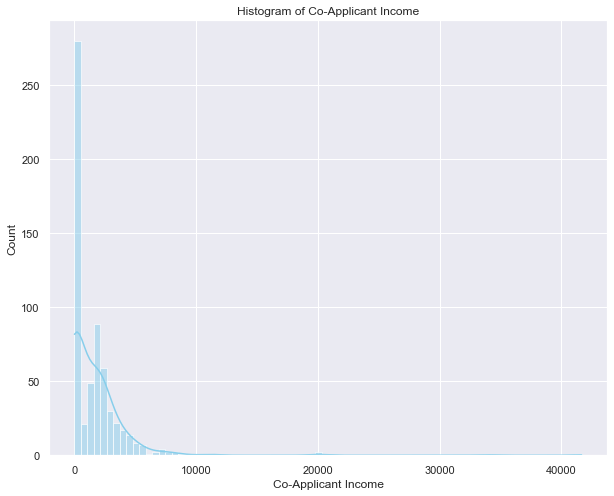

In [718]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=Data, x="CoapplicantIncome", kde=True, color='skyblue')
ax.set_title('Histogram of Co-Applicant Income')
ax.set_xlabel('Co-Applicant Income')

Text(0, 0.5, 'Count')

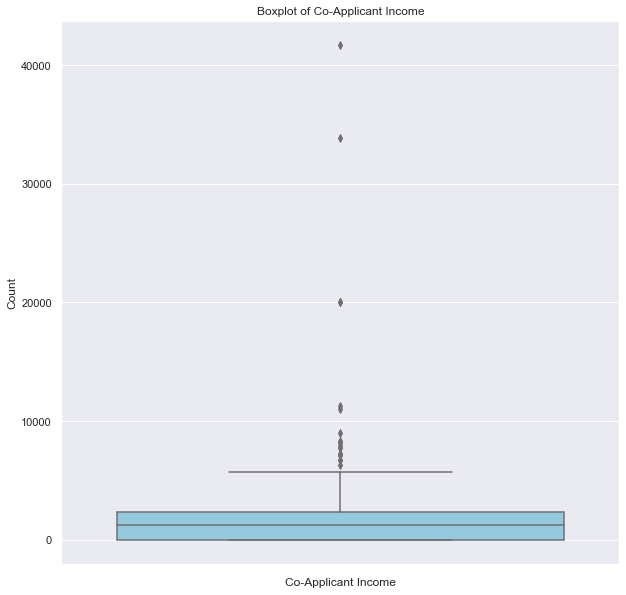

In [719]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = Data, y="CoapplicantIncome", color='skyblue')
ax.set_title('Boxplot of Co-Applicant Income')
ax.set_xlabel('Co-Applicant Income')
ax.set_ylabel('Count')

In [720]:
count_NotNullValues_CoapplicantIncome = len(Data[Data.CoapplicantIncome.notnull()])
count_NullValues_CoapplicantIncome = len(Data[Data.CoapplicantIncome.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_CoapplicantIncome / (len(Data.CoapplicantIncome)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_CoapplicantIncome / (len(Data.CoapplicantIncome)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


#### 3.1.3.3 Loan Amount

In [721]:
print("Null Value in Loan Amount :", Data['LoanAmount'].isnull().sum())

Null Value in Loan Amount : 22


In [722]:
print("Number of Unique Values in Loan Amount :", Data['LoanAmount'].nunique())

Number of Unique Values in Loan Amount : 203


In [723]:
print(Data['LoanAmount'].describe())

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


Text(0.5, 0, 'Loan Amount')

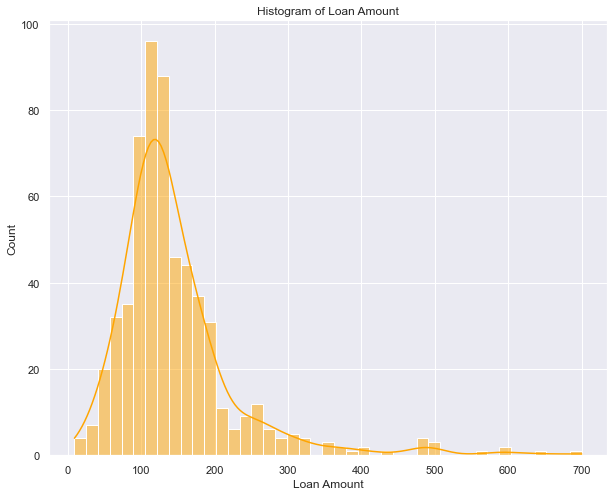

In [724]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=Data, x="LoanAmount", kde=True, color='orange')
ax.set_title('Histogram of Loan Amount')
ax.set_xlabel('Loan Amount')

Text(0, 0.5, 'Count')

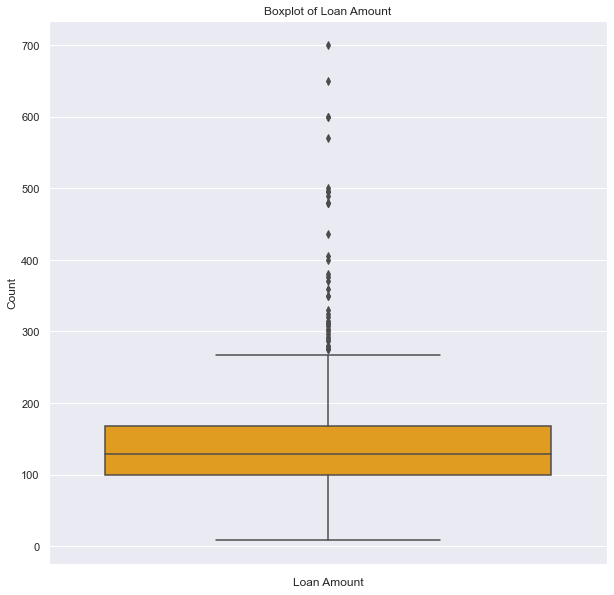

In [725]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = Data, y='LoanAmount', color='orange')
ax.set_title('Boxplot of Loan Amount')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Count')

In [726]:
count_NotNullValues_LoanAmount = len(Data[Data.LoanAmount.notnull()])
count_NullValues_LoanAmount = len(Data[Data.LoanAmount.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_LoanAmount / (len(Data.LoanAmount)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_LoanAmount / (len(Data.LoanAmount)))*100))

Percentage of Not Null Values: 96.42%
Missing values percentage: 3.58%


#### 3.1.3.4 Loan Amount Term

In [727]:
print("Null Value in Loan Amount Term :", Data['Loan_Amount_Term'].isnull().sum())

Null Value in Loan Amount Term : 14


In [728]:
print("Number of Unique Values in Loan Amount Term :", Data['Loan_Amount_Term'].nunique())

Number of Unique Values in Loan Amount Term : 10


In [729]:
print("Number of Loan Amount Term periods (in days) are :\n", Data['Loan_Amount_Term'].value_counts())

Number of Loan Amount Term periods (in days) are :
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Text(0.5, 0, 'Loan Amount Term')

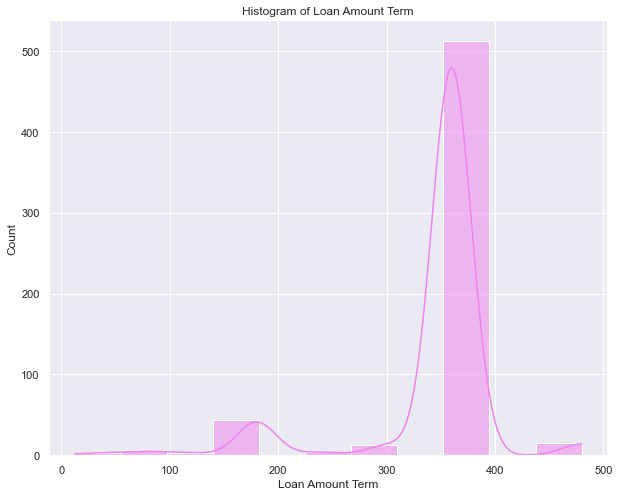

In [730]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=Data, x="Loan_Amount_Term", kde=True, color='violet')
ax.set_title('Histogram of Loan Amount Term')
ax.set_xlabel('Loan Amount Term')

Text(0, 0.5, 'Count')

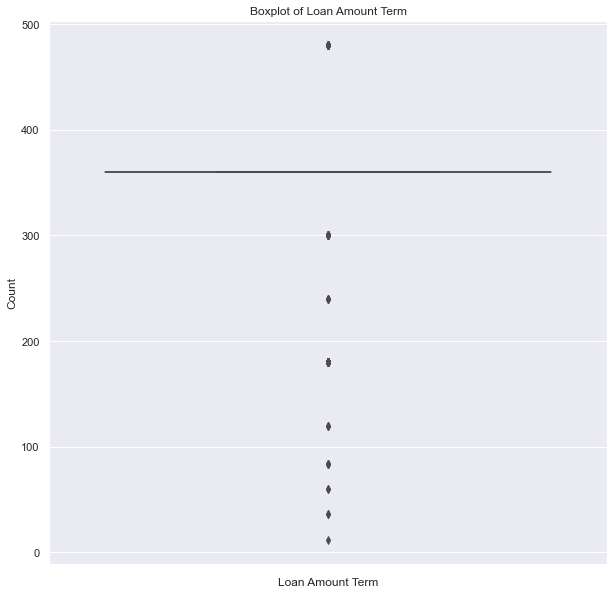

In [731]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = Data, y='Loan_Amount_Term', color='orange')
ax.set_title('Boxplot of Loan Amount Term')
ax.set_xlabel('Loan Amount Term')
ax.set_ylabel('Count')

In [732]:
count12 = len(Data[Data.Loan_Amount_Term == 12.0])
count36 = len(Data[Data.Loan_Amount_Term == 36.0])
count60 = len(Data[Data.Loan_Amount_Term == 60.0])
count84 = len(Data[Data.Loan_Amount_Term == 84.0])
count120 = len(Data[Data.Loan_Amount_Term == 120.0])
count180 = len(Data[Data.Loan_Amount_Term == 180.0])
count240 = len(Data[Data.Loan_Amount_Term == 240.0])
count300 = len(Data[Data.Loan_Amount_Term == 300.0])
count360 = len(Data[Data.Loan_Amount_Term == 360.0])
count480 = len(Data[Data.Loan_Amount_Term == 480.0])
countNull = len(Data[Data.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(Data.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(Data.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


#### 3.1.3.5 Credit Histoy

In [733]:
print("Null Value in Credit History :", Data['Credit_History'].isnull().sum())

Null Value in Credit History : 50


In [734]:
print("Number of Unique Values in Credit History :", Data['Credit_History'].nunique())

Number of Unique Values in Credit History : 2


In [735]:
print("Number of 1.0(Good Credit History) and 0.0(Bad Credit History) in Credit History are :\n", Data['Credit_History'].value_counts())

Number of 1.0(Good Credit History) and 0.0(Bad Credit History) in Credit History are :
 1.0    475
0.0     89
Name: Credit_History, dtype: int64


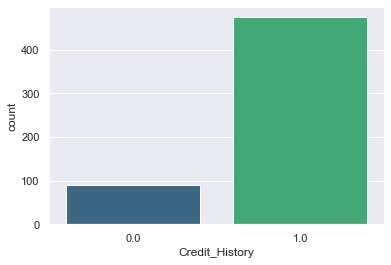

In [736]:
sns.countplot(x="Credit_History", data=Data, palette="viridis")
plt.show()

In [737]:
count1 = len(Data[Data.Credit_History == 1])
count0 = len(Data[Data.Credit_History == 0])
countNull = len(Data[Data.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(Data.Credit_History)))*100))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(Data.Credit_History)))*100))
print("Missing values percentage: {:.2f}%".format((countNull / (len(Data.Credit_History)))*100))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


## 3.2 Bivariate Analysis

### 3.2.1 Categorical - Categorical

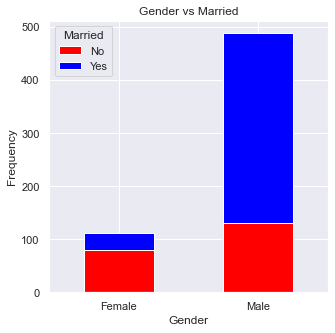

In [738]:
pd.crosstab(Data.Gender,Data.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['red','blue'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

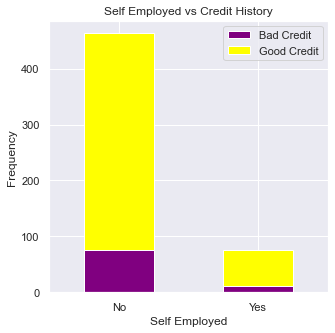

In [739]:
pd.crosstab(Data.Self_Employed,Data.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['purple','yellow'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

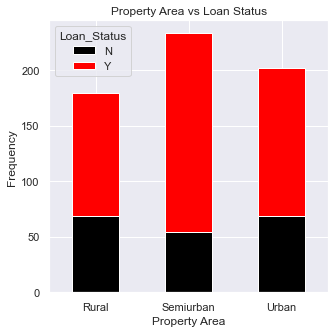

In [740]:
pd.crosstab(Data.Property_Area,Data.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['black','red'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### 3.2.2 Categorical - Numerical

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

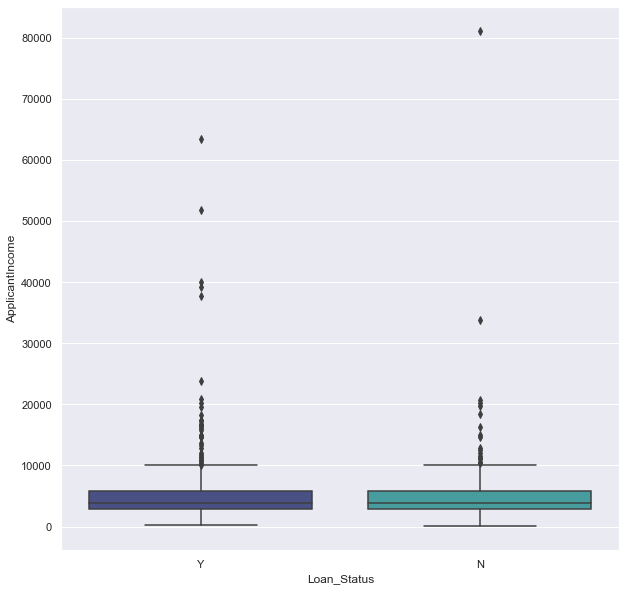

In [741]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=Data, palette="mako")

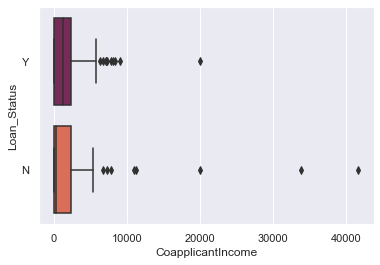

In [742]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=Data, palette="rocket");

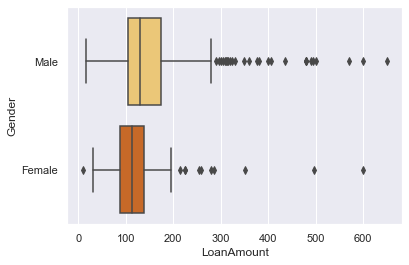

In [743]:
sns.boxplot(x="LoanAmount", y="Gender", data=Data, palette="YlOrBr");

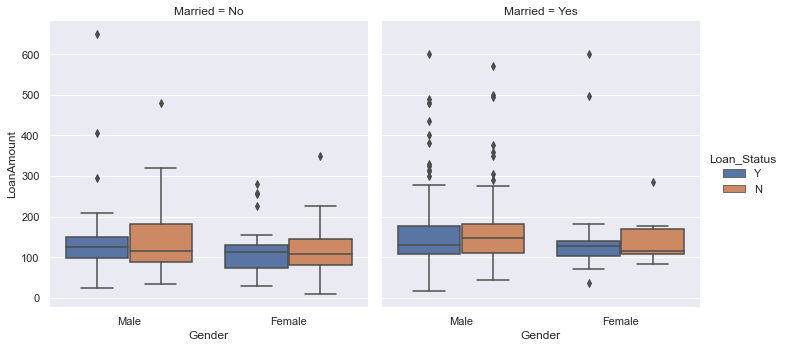

In [744]:
sns.catplot(x = 'Gender', y = 'LoanAmount', data = Data, kind = 'box', hue = 'Loan_Status', col = 'Married')

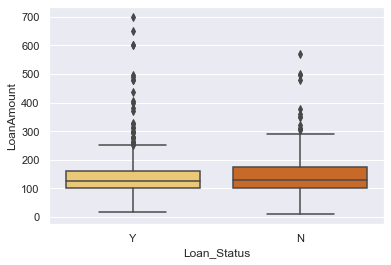

In [745]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=Data, palette="YlOrBr");

### 3.2.3 Numerical - Numerical

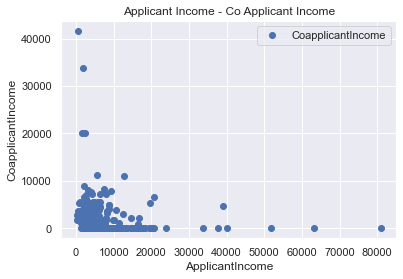

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)


In [746]:
Data.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', Data['ApplicantIncome'].corr(Data['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(Data['ApplicantIncome'], Data['CoapplicantIncome']))

## 3.3 Null Values

In [747]:
Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

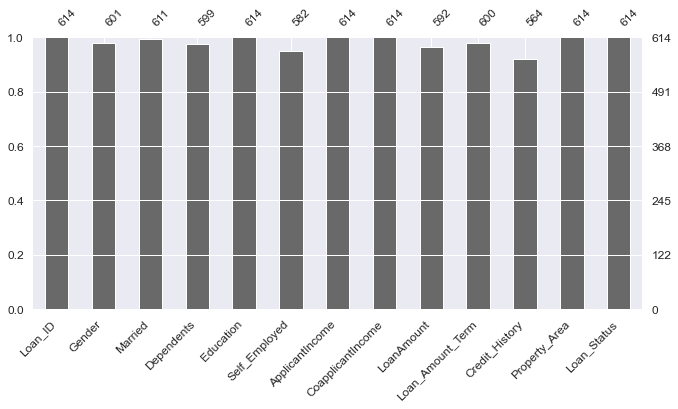

In [748]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(Data, ax = axz, fontsize = 12);

# 4 Data Preprocessing

## 4.1 Drop unecessary feature

In [749]:
Data = Data.drop(['Loan_ID'], axis = 1)

In [750]:
print('The number of Columns in Train Data are :', len(Data.columns))

The number of Columns in Train Data are : 12


## 4.2 Treatment of Null Values

In [751]:
Data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 4.2.1 Categorical Features

In [752]:
Data['Gender'].fillna(Data['Gender'].mode()[0],inplace=True)
Data['Married'].fillna(Data['Married'].mode()[0],inplace=True)
Data['Dependents'].fillna(Data['Dependents'].mode()[0],inplace=True)
Data['Self_Employed'].fillna(Data['Self_Employed'].mode()[0],inplace=True)
Data['Credit_History'].fillna(Data['Credit_History'].mode()[0],inplace=True)
Data['Loan_Amount_Term'].fillna(Data['Loan_Amount_Term'].mode()[0],inplace=True)

In [753]:
Data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']].isnull().sum()

Gender              0
Married             0
Dependents          0
Self_Employed       0
Credit_History      0
Loan_Amount_Term    0
dtype: int64

### 4.2.2 Numerical Features

In [754]:
Data['LoanAmount'].fillna(Data['LoanAmount'].mean(),inplace=True)

In [755]:
Data[['LoanAmount']].isnull().sum()

LoanAmount    0
dtype: int64

## 4.3 One-hot Encoding

In [756]:
Data = pd.get_dummies(Data)
Data = Data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
Data.rename(columns=new, inplace=True)

In [757]:
Data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


In [758]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender                   614 non-null    uint8  
 6   Married                  614 non-null    uint8  
 7   Dependents_0             614 non-null    uint8  
 8   Dependents_1             614 non-null    uint8  
 9   Dependents_2             614 non-null    uint8  
 10  Dependents_3+            614 non-null    uint8  
 11  Education                614 non-null    uint8  
 12  Self_Employed            614 non-null    uint8  
 13  Property_Area_Rural      614 non-null    uint8  
 14  Property_Area_Semiurban  6

## 4.4 Remove Outliers

In [759]:
def outliers(df1,col):
        IQR=df1[col].quantile(0.75)-df1[col].quantile(0.25)
        LW=df1[col].quantile(0.25)-(IQR*1.5)
        UW=df1[col].quantile(0.75)+(IQR*1.5)
        print("For feature {} Lower Whisker is {} and Upper Whisker is {} \n".format(col,LW,UW))
        df1[col]=np.where(df1[col]<LW,df1[col].mean(),df1[col])
        df1[col]=np.where(df1[col]>UW,df1[col].mean(),df1[col])

In [760]:
num_col = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

In [761]:
for b in num_col:
    outliers(Data,b)

For feature ApplicantIncome Lower Whisker is -1498.75 and Upper Whisker is 10171.25 

For feature CoapplicantIncome Lower Whisker is -3445.875 and Upper Whisker is 5743.125 

For feature LoanAmount Lower Whisker is 3.5 and Upper Whisker is 261.5 



<AxesSubplot:ylabel='LoanAmount'>

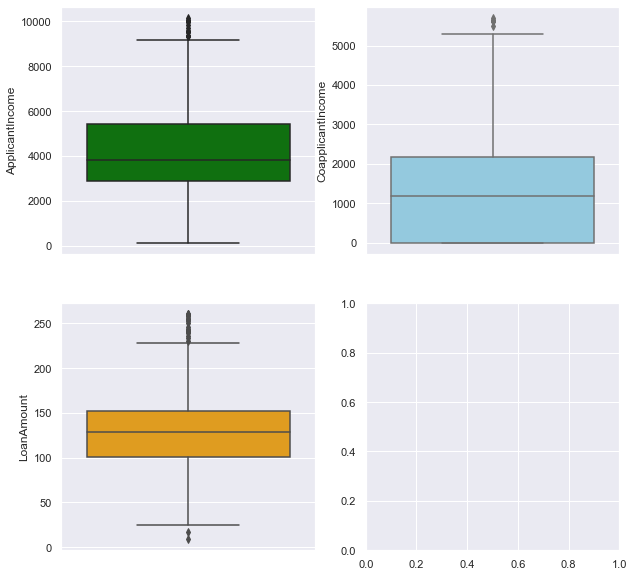

In [762]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(data=Data, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=Data, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=Data, y="LoanAmount", ax=axs1[1, 0], color='orange')

## 4.5 Skewed Distribution Treatment

In [763]:
Data.ApplicantIncome = np.sqrt(Data.ApplicantIncome)
Data.CoapplicantIncome = np.sqrt(Data.CoapplicantIncome)
Data.LoanAmount = np.sqrt(Data.LoanAmount)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

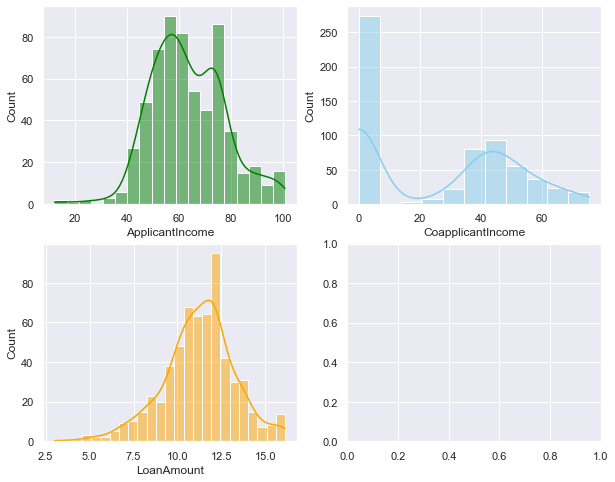

In [764]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=Data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=Data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=Data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

## 4.6 Correlation Analysis

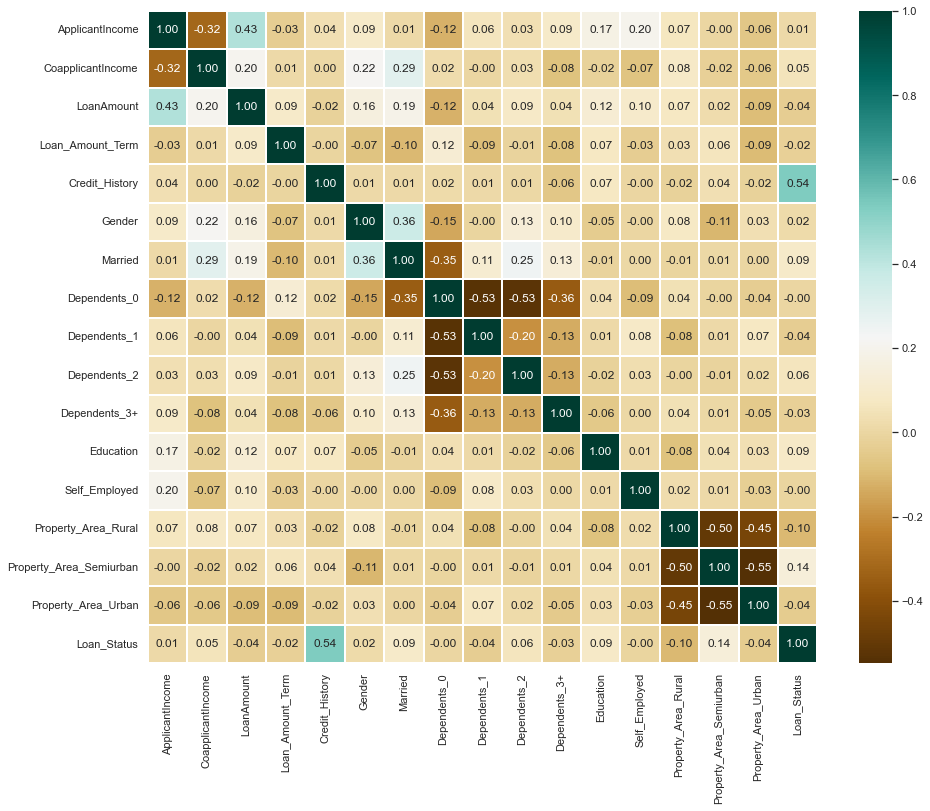

In [765]:
plt.figure(figsize=(15,12))
sns.heatmap(Data.corr(), annot=True, fmt= '.2f', cmap='BrBG', linewidths = 2);

## 4.7 Feature Separating

In [766]:
X = Data.drop(["Loan_Status"], axis=1)
y = Data["Loan_Status"]

## 4.8 SMOTE Technique

In [767]:
X, y = SMOTE().fit_resample(X, y)

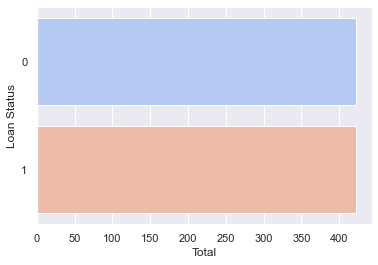

In [768]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=Data, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## 4.9 Data Normalization

In [769]:
X = MinMaxScaler().fit_transform(X)

## 4.10 Splitting Data Set

In [770]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 5 Models

## 5.1 Logistic Regression

In [771]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.97      0.66      0.79        86
           1       0.74      0.98      0.84        83

    accuracy                           0.82       169
   macro avg       0.85      0.82      0.81       169
weighted avg       0.85      0.82      0.81       169

[[57 29]
 [ 2 81]]
LR accuracy: 81.66%


## 5.2 K-Nearest Neighbour (KNN)

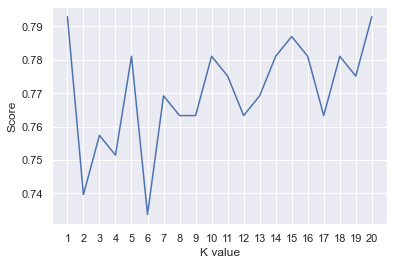

KNN best accuracy: 79.29%


In [772]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 5.3 Decision Tree

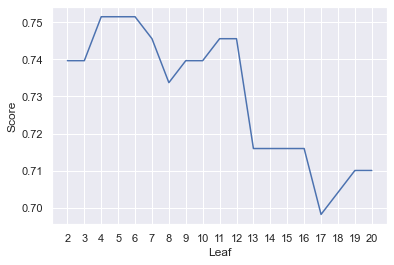

Decision Tree Accuracy: 75.15%


In [773]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## 5.4 Random Forest

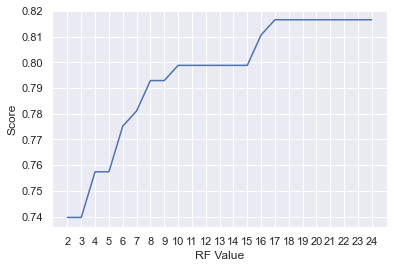

Random Forest Accuracy:  81.66%


In [774]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

# 6 Model Comparison

In [775]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,81.656805
3,Random Forest,81.656805
1,K Neighbors,79.289941
2,Decision Tree,75.147929
